In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dff=pd.read_csv("SummaryofWeather.csv",low_memory=False)

In [3]:
dff.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<AxesSubplot:xlabel='MinTemp'>

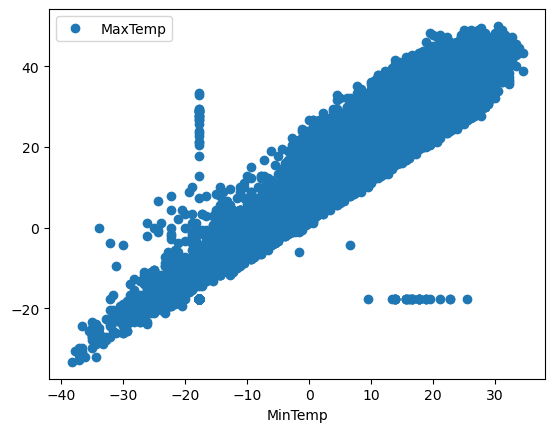

In [5]:
dff.plot(x='MinTemp',y='MaxTemp',style='o')

In [6]:
x=dff['MinTemp'].values.reshape(-1,1)
y= dff['MaxTemp'].values.reshape(-1,1)

In [7]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [8]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [9]:
x_train,x_test,y_train , y_test =train_test_split(x,y,test_size=.20)

In [10]:
module=LinearRegression()
module.fit(x_train,y_train)

LinearRegression()

In [11]:
module.intercept_

array([10.68339569])

In [12]:
y_pre=module.predict(x_test)

In [13]:
y_pre

array([[15.28274209],
       [31.12493525],
       [31.12493525],
       ...,
       [26.01455036],
       [33.1690892 ],
       [31.12493525]])

In [14]:
dff2=pd.DataFrame({'actuale':y_test.flatten(),'predection':y_pre.flatten()})

In [15]:
dff2

,actuale,predection
0,15.000000,15.282742
1,26.666667,31.124935
2,27.222222,31.124935
3,34.444444,24.992473
4,-8.888889,-4.647759
...,...,...
23803,21.666667,18.348973
23804,35.000000,33.169089
23805,21.111111,26.014550
23806,31.111111,33.169089


<AxesSubplot:>

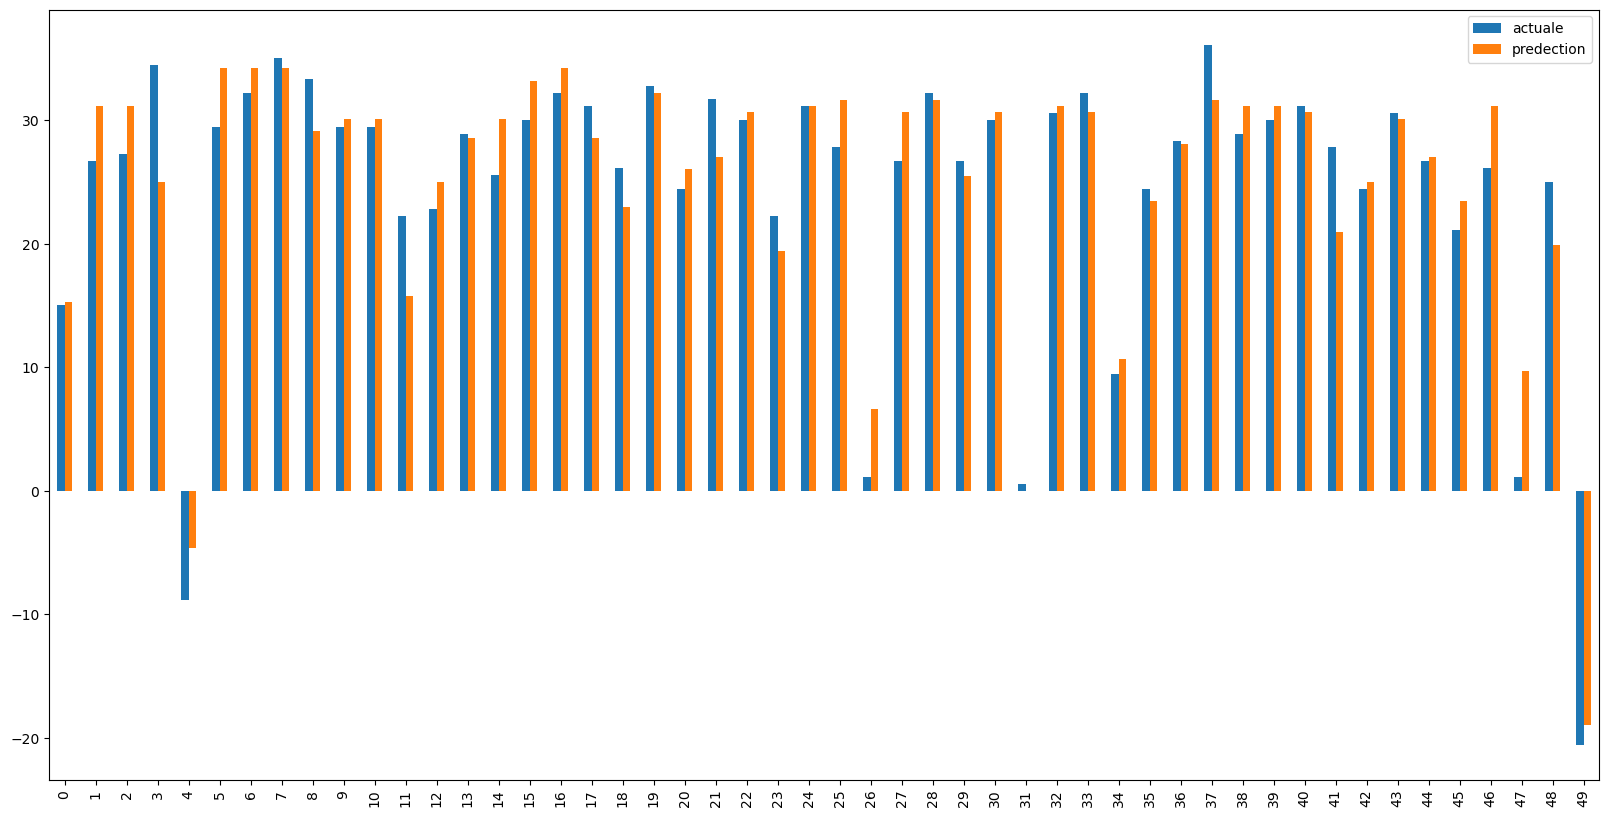

In [16]:
dff2.head(50).plot(kind='bar',figsize=(20,10))

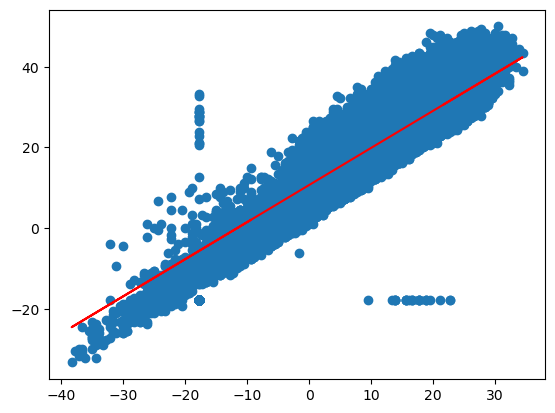

In [17]:
plt.scatter(x_train , y_train)
plt.plot(x_train,module.predict(x_train),color='red')